In [14]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout, Softmax, ReLU
import os
import pydot
import graphviz
import pydotplus

In [15]:
from tensorflow.keras.optimizers import *
img_width, img_height = 150, 150
training_data_dir = 'E:/KrishM/ML/IMG/MnistExt/trainingSet/trainingSet'
validation_data_dir = 'E:/KrishM/ML/IMG/MnistExt/validationset/validationset'
#validation_data_dir= 'E:/KrishM/ML/IMG/MnistExt/trainingSet/trainingSet'
batch_size = 32

In [16]:
datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.4
)

In [17]:
training_generator = datagen.flow_from_directory(
    training_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    subset='training', 
    class_mode='categorical'
)

Found 25205 images belonging to 10 classes.


In [18]:
validation_datagen= ImageDataGenerator(rescale = 1/255)

In [19]:
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset="validation",
    class_mode='categorical'
)

Found 240 images belonging to 10 classes.


In [20]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPool2D(strides = (2, 2)))
model1.add(Dense(10, activation = 'softmax'))

In [21]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(150, 150, 3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(strides = (2, 2)))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

In [22]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(150, 150, 3)))
model3.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(strides = (2, 2)))
model3.add(Dropout(0.3))
model3.add(Conv2D(64, kernel_size=5, activation = 'relu'))
model3.add(Conv2D(64, kernel_size=5, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(strides=(2, 2)))
model3.add(Dropout(0.3))
model3.add(Dense(1024))
model3.add(Dense(512))
model3.add(Dense(10, activation = 'softmax'))

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)       

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

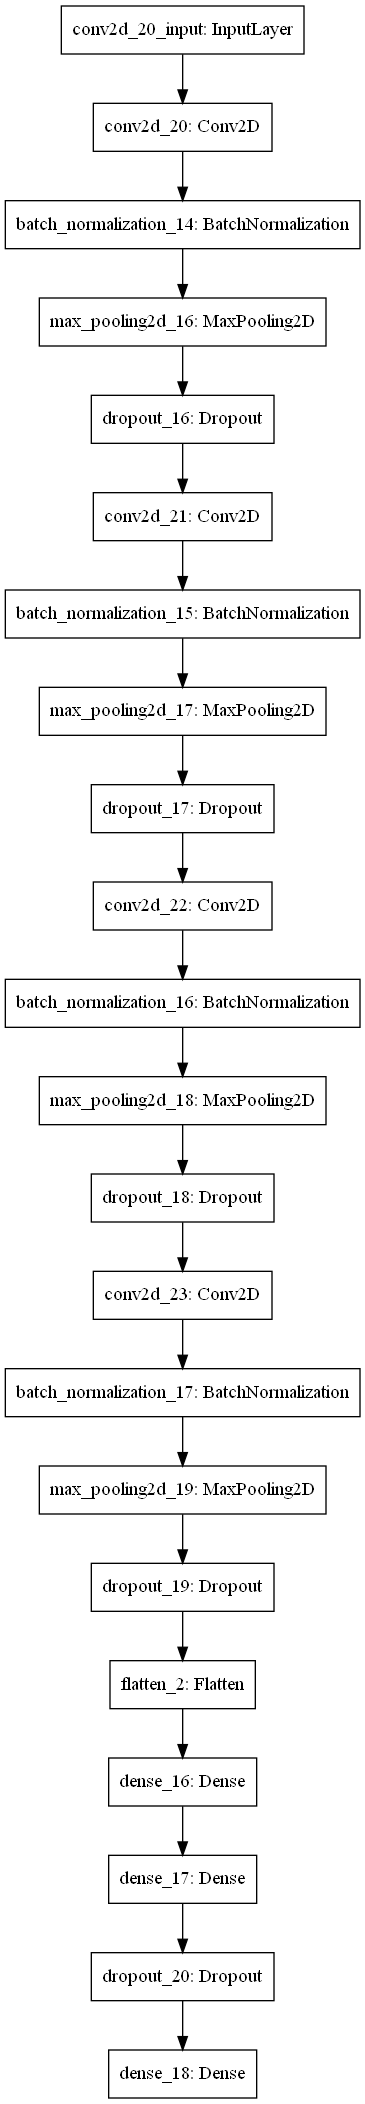

In [33]:
import tensorflow.keras
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'mnist1.png')

In [34]:
from tensorflow.keras.callbacks import History
history = History()
#batch_size = 32
#steps = totalnumberofimages / batch_size = 25025 / 32 = 780

In [35]:
model.fit(
    training_generator,
    batch_size=64,
    steps_per_epoch=780,
    epochs = 2,
    callbacks=[history],
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/2
780/780 [==============================] - 924s 1s/step - loss: 1.8224 - accuracy: 0.3385 - val_loss: 8.8198 - val_accuracy: 0.1625
Epoch 2/2
780/780 [==============================] - 995s 1s/step - loss: 1.1066 - accuracy: 0.6159 - val_loss: 1.6017 - val_accuracy: 0.6083


In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [38]:
from tensorflow.keras.models import load_model
model.save('myconvmodel.h5')
del model
model = load_model('myconvmodel.h5')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)       

In [39]:
model.save_weights('myconvmodel_weights.h5')
model.load_weights('myconvmodel_weights.h5')
